# This is a demo of `how to read the hdf5 file` and describe the data structure of our file. 
---

## Import Package
Import `h5py` to read hdf5 in python.

In [1]:
import h5py 

## Input data by `h5py`
Using `h5py` package can help you to parse the hdf5 file.

In [2]:
f = h5py.File('../output/event_record_pptt_10k_atlas.h5','r') 

## Dig into data structure
To see how many groups defined in the hdf5 file, you can use the following script.

In [3]:
f.keys()

<KeysViewHDF5 ['N_match_top_in_event', 'jet_barcode', 'jet_btag', 'jet_eta', 'jet_mass', 'jet_parton_index', 'jet_phi', 'jet_pt', 'parton_barcode', 'parton_eta', 'parton_jet_index', 'parton_mass', 'parton_pdgid', 'parton_phi', 'parton_pt']>

The output upon shows that we have 14 groups of data, contains the properties of `jet` and `parton`.
We can input the data by the following method.

In [4]:
jet_pt = f['jet_pt']
jet_phi = f['jet_phi']
jet_eta = f['jet_eta']
jet_barcode = f['jet_barcode']
jet_mass = f['jet_mass']
jet_btag = f['jet_btag']
jet_parton_index = f['jet_parton_index']

parton_pdgid = f['parton_pdgid']
parton_pt = f['parton_pt']
parton_eta = f['parton_eta']
parton_phi = f['parton_phi']
parton_mass = f['parton_mass']
parton_barcode = f['parton_barcode']
parton_jet_index = f['parton_jet_index']

N_match_top_in_event = f['N_match_top_in_event']

## introduction of groups

* (mass, pt, eta, phi) in `jet` and `parton` represent the kinematics properties of jet and parton.
* `barcode` is defined to represent the relation between each parton candidate and jet.
* `parton_jet_index` and `jet_parton_index` is to point out which jet/parton is matched to(by using min dR(parton. jet))
* `btag` is the binary record, shows whether a jet has been tagged as `b jet` or not.
* `N_match_top_in_event` is a record which specify how many $t$ abd $\bar{t}$ candidate can be formed byparton matched to a jet.


### Example
To check how many events in this hdf5 file.


In [5]:
len(parton_pt)

1946

The data format of each group is `h5py._hl.dataset.Dataset`.

In [6]:
type(parton_pt)

h5py._hl.dataset.Dataset

And the array inside each group is `numpy.ndarray`.

In [7]:
type(parton_pt[0])

numpy.ndarray

## Validation plots 

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

In [9]:
W_plus_inv = []
W_minus_inv = []

tmp = 0
tmp_p = 0

for i in range(len(N_match_top_in_event)):
    if N_match_top_in_event[i] == 2:
        pt_1 = parton_pt[i][1]
        pt_2 = parton_pt[i][2]

        eta_1 = parton_eta[i][1]
        eta_2 = parton_eta[i][2]

        phi_1 = parton_phi[i][1]
        phi_2 = parton_phi[i][2]

        tmp = np.sqrt( 2*parton_pt[i][1]*parton_pt[i][2]*( np.cosh( parton_eta[i][1] - parton_eta[i][2] ) - np.cos( parton_phi[i][1] - parton_phi[i][2] ) ) )

        pt_3 = parton_pt[i][4]
        pt_4 = parton_pt[i][5]

        eta_3 = parton_eta[i][4]
        eta_4 = parton_eta[i][5]

        phi_3 = parton_phi[i][4]
        phi_4 = parton_phi[i][5]

        tmp_p = np.sqrt( 2*pt_3*pt_4*( np.cosh( eta_3 - eta_4 ) - np.cos( phi_3 - phi_4 ) ) )

        W_plus_inv.append(tmp)
        W_minus_inv.append(tmp_p)


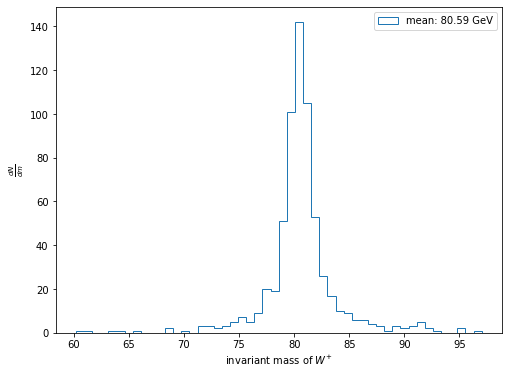

In [10]:
plt.figure(figsize=(8,6))
plt.hist(W_plus_inv, bins = 50 ,histtype='step', label='mean: {0:.2f} GeV'.format(np.mean(W_plus_inv)))
plt.xlabel(r'invariant mass of $W^{+}$')
plt.ylabel(r'$\frac{dN}{dm}$')
plt.legend(loc='upper right')
plt.show()

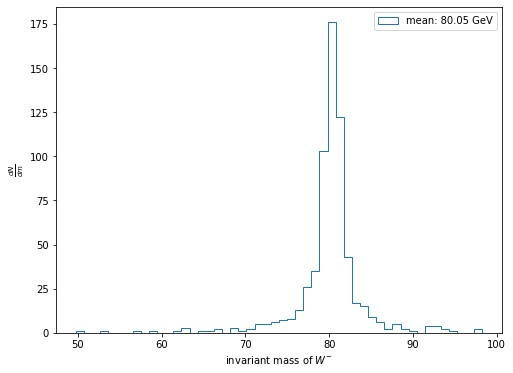

In [11]:
plt.figure(figsize=(8,6))
plt.hist(W_minus_inv,  bins = 50 ,histtype='step', label='mean: {0:.2f} GeV'.format(np.mean(W_minus_inv)))
plt.xlabel(r'invariant mass of $W^{-}$')
plt.ylabel(r'$\frac{dN}{dm}$')
plt.legend(loc='upper right')
plt.show()

In [12]:
top_inv = []
top_bar_inv = []
tmp = 0
tmp_p = 0

for i in range(len(N_match_top_in_event)):
    if N_match_top_in_event[i] == 2:

        pt_0 = parton_pt[i][0]
        pt_1 = parton_pt[i][1]
        pt_2 = parton_pt[i][2]

        px_0 = pt_0 * np.cos(parton_phi[i][0])
        px_1 = pt_1 * np.cos(parton_phi[i][1])
        px_2 = pt_2 * np.cos(parton_phi[i][2])

        py_0 = pt_0 * np.sin(parton_phi[i][0])
        py_1 = pt_1 * np.sin(parton_phi[i][1])
        py_2 = pt_2 * np.sin(parton_phi[i][2])

        pz_0 = pt_0 * np.sinh(parton_eta[i][0])
        pz_1 = pt_1 * np.sinh(parton_eta[i][1])
        pz_2 = pt_2 * np.sinh(parton_eta[i][2])

        e_0 = np.sqrt( (px_0**2 + py_0**2 + pz_0**2 ) + parton_mass[i][0]**2 )
        e_1 = np.sqrt( (px_1**2 + py_1**2 + pz_1**2 ) + parton_mass[i][1]**2 )
        e_2 = np.sqrt( (px_2**2 + py_2**2 + pz_2**2 ) + parton_mass[i][2]**2 )


        tmp = np.sqrt( (e_0 + e_1 + e_2)**2 - (px_0 + px_1 + px_2)**2 - (py_0 + py_1 + py_2)**2 - (pz_0 + pz_1 + pz_2)**2  )        
        top_inv.append(tmp)


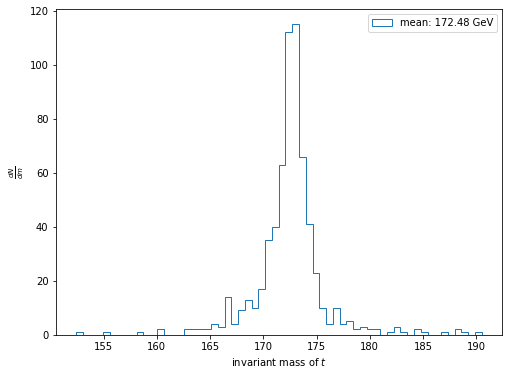

In [13]:
plt.figure(figsize=(8,6))
plt.hist(top_inv,  bins = 60 ,histtype='step', label='mean: {0:.2f} GeV'.format(np.mean(top_inv)))
plt.xlabel(r'invariant mass of $t$')
plt.ylabel(r'$\frac{dN}{dm}$')
plt.legend(loc='upper right')
plt.show()

In [14]:
for i in range(len(N_match_top_in_event)):
    if N_match_top_in_event[i] == 2:

        pt_3 = parton_pt[i][3]
        pt_4 = parton_pt[i][4]
        pt_5 = parton_pt[i][5]

        px_3 = pt_3 * np.cos(parton_phi[i][3])
        px_4 = pt_4 * np.cos(parton_phi[i][4])
        px_5 = pt_5 * np.cos(parton_phi[i][5])

        py_3 = pt_3 * np.sin(parton_phi[i][3])
        py_4 = pt_4 * np.sin(parton_phi[i][4])
        py_5 = pt_5 * np.sin(parton_phi[i][5])

        pz_3 = pt_3 * np.sinh(parton_eta[i][3])
        pz_4 = pt_4 * np.sinh(parton_eta[i][4])
        pz_5 = pt_5 * np.sinh(parton_eta[i][5])

        e_3 = np.sqrt( (px_3**2 + py_3**2 + pz_3**2 ) + parton_mass[i][3]**2 )
        e_4 = np.sqrt( (px_4**2 + py_4**2 + pz_4**2 ) + parton_mass[i][4]**2 )
        e_5 = np.sqrt( (px_5**2 + py_5**2 + pz_5**2 ) + parton_mass[i][5]**2 )

        tmp_p = np.sqrt( (e_3 + e_4 + e_5)**2 - (px_3 + px_4 + px_5)**2 - (py_3 + py_4 + py_5)**2 - (pz_3 + pz_4 + pz_5)**2  )
        
        top_bar_inv.append(tmp_p)

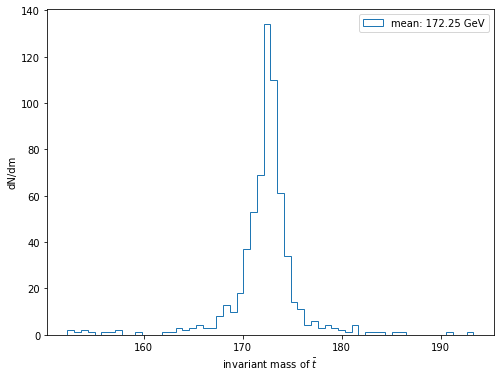

In [15]:
plt.figure(figsize=(8,6))
plt.hist(top_bar_inv,  bins = 60 ,histtype='step', label='mean: {0:.2f} GeV'.format(np.mean(top_bar_inv)))
plt.xlabel(r'invariant mass of $\bar{t}$')
plt.ylabel('dN/dm')
plt.legend(loc='upper right')
plt.show()

In [16]:
W_plus_inv_jet = []
W_minus_inv_jet = []

tmp = 0
tmp_p = 0

for i in range(len(N_match_top_in_event)):
    if N_match_top_in_event[i] == 2:
        for j in range(len(jet_pt[i])):
            if jet_parton_index[i][j] == 1:
                pt_1 = jet_pt[i][j]
                eta_1 = jet_eta[i][j]
                phi_1 = jet_phi[i][j]

            if jet_parton_index[i][j] == 2:
                pt_2 = jet_pt[i][j]
                eta_2 = jet_eta[i][j]
                phi_2 = jet_phi[i][j]

            if jet_parton_index[i][j] == 4:
                pt_3 = jet_pt[i][j]
                eta_3 = jet_eta[i][j]
                phi_3 = jet_phi[i][j]

            if jet_parton_index[i][j] == 5:
                pt_4 = jet_pt[i][j]
                eta_4 = jet_eta[i][j]
                phi_4 = jet_phi[i][j]

            tmp = np.sqrt( 2*pt_1*pt_2*( np.cosh( eta_1 - eta_2 ) - np.cos( phi_1 - phi_2 ) ) )
            tmp_p = np.sqrt( 2*pt_3*pt_4*( np.cosh( eta_3 - eta_4 ) - np.cos( phi_3 - phi_4 ) ) )

            W_plus_inv_jet.append(tmp)
            W_minus_inv_jet.append(tmp_p)


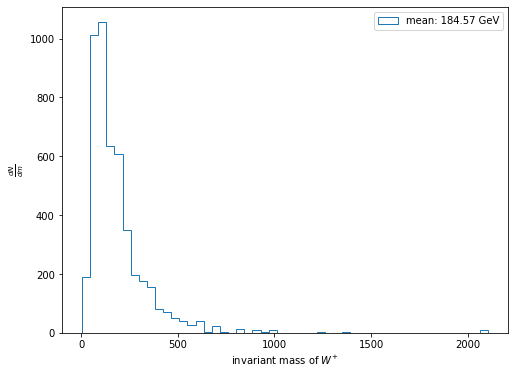

In [17]:
plt.figure(figsize=(8,6))
plt.hist(W_plus_inv_jet, bins = 50 ,histtype='step', label='mean: {0:.2f} GeV'.format(np.mean(W_plus_inv_jet)))
plt.xlabel(r'invariant mass of $W^{+}$')
plt.ylabel(r'$\frac{dN}{dm}$')
plt.legend(loc='upper right')
plt.show()

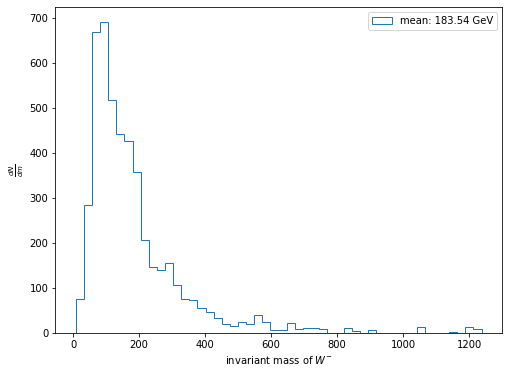

In [18]:
plt.figure(figsize=(8,6))
plt.hist(W_minus_inv_jet, bins = 50 ,histtype='step', label='mean: {0:.2f} GeV'.format(np.mean(W_minus_inv_jet)))
plt.xlabel(r'invariant mass of $W^{-}$')
plt.ylabel(r'$\frac{dN}{dm}$')
plt.legend(loc='upper right')
plt.show()

In [19]:
t_inv_jet = []
t_bar_inv_jet = []

tmp = 0
tmp_p = 0

for i in range(len(N_match_top_in_event)):
    if N_match_top_in_event[i] == 2:
        for j in range(len(jet_parton_index[i])):
            if jet_parton_index[i][j] == 0:
                pt_0 = jet_pt[i][j]
                eta_0 = jet_eta[i][j]
                phi_0 = jet_phi[i][j]
                px_0 = pt_0*np.cos( phi_0 )
                py_0 = pt_0*np.sin( phi_0 )
                pz_0 = pt_0*np.sinh( eta_0 )
                mass_0 = jet_mass[i][j]
                e_0 = np.sqrt( (px_0**2 + py_0**2 + pz_0**2 ) + mass_0**2 ) 

            if jet_parton_index[i][j] == 1:
                pt_1 = jet_pt[i][j]
                eta_1 = jet_eta[i][j]
                phi_1 = jet_phi[i][j]
                px_1 = pt_1*np.cos( phi_1 )
                py_1 = pt_1*np.sin( phi_1 )
                pz_1 = pt_1*np.sinh( eta_1 )
                mass_1 = jet_mass[i][j]
                e_1 = np.sqrt( (px_1**2 + py_1**2 + pz_1**2 ) + mass_1**2 ) 

            if jet_parton_index[i][j] == 2:
                pt_2 = jet_pt[i][j]
                eta_2 = jet_eta[i][j]
                phi_2 = jet_phi[i][j]
                px_2 = pt_2*np.cos( phi_2 )
                py_2 = pt_2*np.sin( phi_2 )
                pz_2 = pt_2*np.sinh( eta_2 )
                mass_2 = jet_mass[i][j]
                e_2 = np.sqrt( (px_2**2 + py_2**2 + pz_2**2 ) + mass_2**2 )

            if jet_parton_index[i][j] == 3:
                pt_3 = jet_pt[i][j]
                eta_3 = jet_eta[i][j]
                phi_3 = jet_phi[i][j]
                px_3 = pt_3*np.cos( phi_3 )
                py_3 = pt_3*np.sin( phi_3 )
                pz_3 = pt_3*np.sinh( eta_3 )
                mass_3 = jet_mass[i][j]
                e_3 = np.sqrt( (px_3**2 + py_3**2 + pz_3**2 ) + mass_3**2 )

            if jet_parton_index[i][j] == 4:
                pt_4 = jet_pt[i][j]
                eta_4 = jet_eta[i][j]
                phi_4 = jet_phi[i][j]
                px_4 = pt_4*np.cos( phi_4 )
                py_4 = pt_4*np.sin( phi_4 )
                pz_4 = pt_4*np.sinh( eta_4 )
                mass_4 = jet_mass[i][j]
                e_4 = np.sqrt( (px_4**2 + py_4**2 + pz_4**2 ) + mass_4**2 )

            if jet_parton_index[i][j] == 5:
                pt_5 = jet_pt[i][j]
                eta_5 = jet_eta[i][j]
                phi_5 = jet_phi[i][j]
                px_5 = pt_5*np.cos( phi_5 )
                py_5 = pt_5*np.sin( phi_5 )
                pz_5 = pt_5*np.sinh( eta_5 )
                mass_5 = jet_mass[i][j]
                e_5 = np.sqrt( (px_5**2 + py_5**2 + pz_5**2 ) + mass_5**2 )

        tmp = np.sqrt( (e_0 + e_1 + e_2)**2 - (px_0 + px_1 + px_2)**2 - (py_0 + py_1 + py_2)**2 - (pz_0 + pz_1 + pz_2)**2 )
        tmp_p = np.sqrt( (e_3 + e_4 + e_5)**2 - (px_3 + px_4 + px_5)**2 - (py_3 + py_4 + py_5)**2 - (pz_3 + pz_4 + pz_5)**2 )

        t_inv_jet.append(tmp)
        t_bar_inv_jet.append(tmp_p)


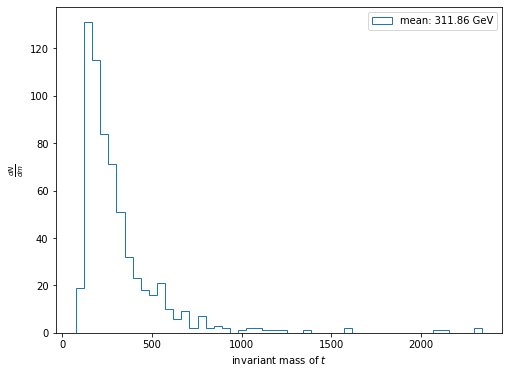

In [20]:
plt.figure(figsize=(8,6))
plt.hist(t_inv_jet, bins = 50 ,histtype='step', label='mean: {0:.2f} GeV'.format(np.mean(t_inv_jet)))
plt.xlabel(r'invariant mass of $t$')
plt.ylabel(r'$\frac{dN}{dm}$')
plt.legend(loc='upper right')
plt.show()

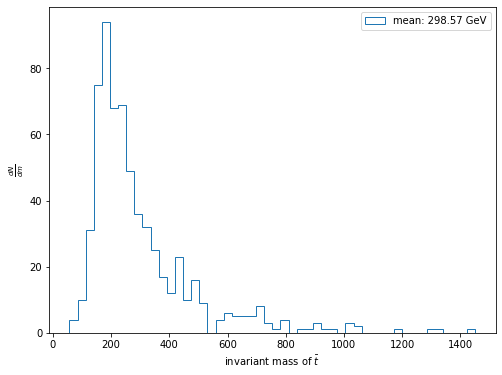

In [21]:
plt.figure(figsize=(8,6))
plt.hist(t_bar_inv_jet, bins = 50 ,histtype='step', label='mean: {0:.2f} GeV'.format(np.mean(t_bar_inv_jet)))
plt.xlabel(r'invariant mass of $\bar{t}$')
plt.ylabel(r'$\frac{dN}{dm}$')
plt.legend(loc='upper right')
plt.show()